<a href="https://colab.research.google.com/github/undanielrojo/Trabajos_salle/blob/main/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

proyecto 2 Clase Machine_learning

Santiago Yate - 63202046 Daniel Carranza - 63171111


In [ ]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Importar la DATA

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')

In [ ]:
dataset

In [ ]:
dataset.head()

In [ ]:
dataset.tail()

Limpieza de DATA

In [ ]:
dataset.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      'Avg_Utilization_Ratio','Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal'],inplace = True)

In [ ]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,12691.0,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,8256.0,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,3418.0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,3313.0,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,4716.0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,4003.0,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,4277.0,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,5409.0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,5281.0,8395,62


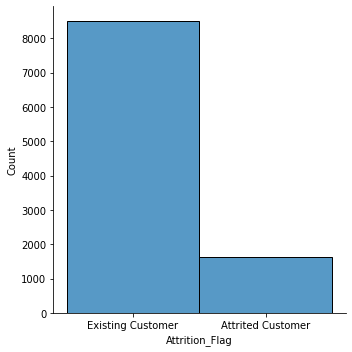

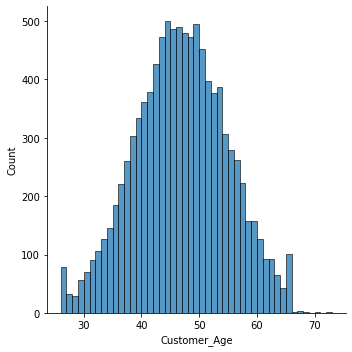

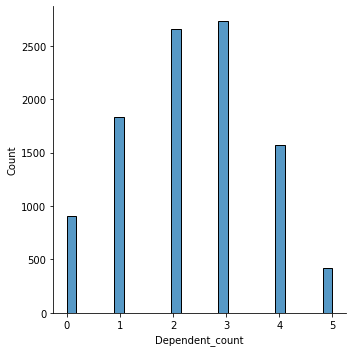

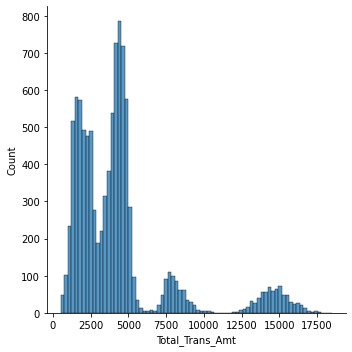

In [ ]:
sns.displot(dataset, x="Attrition_Flag")
sns.displot(dataset, x="Customer_Age")
sns.displot(dataset, x="Dependent_count")
sns.displot(dataset, x="Total_Trans_Amt")
plt.show()

Visualizacion de las distribuciones de Customer Age, Dependent count y Total trans amt

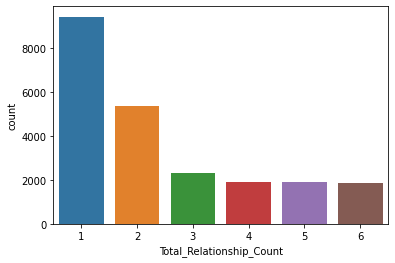

In [ ]:

sns.countplot(data=dataset, x="Total_Relationship_Count")
plt.show()

Visualizacion de proporciones de Total_Relationship_Coun


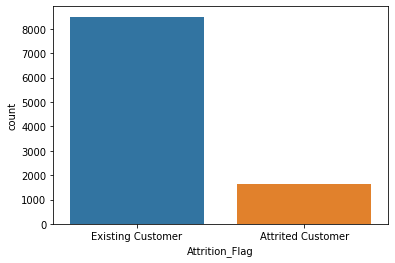

In [ ]:
sns.countplot(data=dataset, x="Attrition_Flag")
plt.show()

Visualizacion de proporciones entre los clientes activos fieles y los que han dejado de comprar

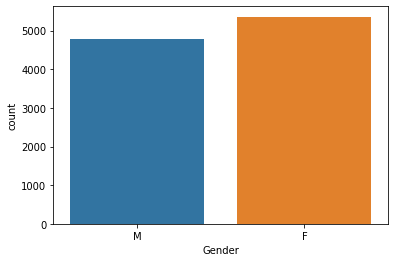

In [ ]:
sns.countplot(data=dataset, x="Gender")
plt.show()

Visualizacion de proporcion de los generos

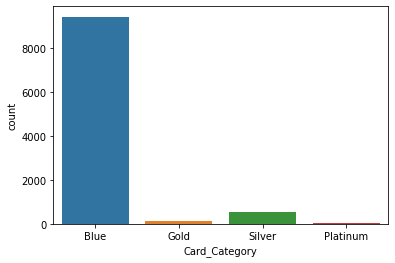

In [ ]:
sns.countplot(data=dataset, x="Card_Category")
plt.show()

Visualizacion de proporcion de las personas que disponen la membresia blue, gold, silver y platinum

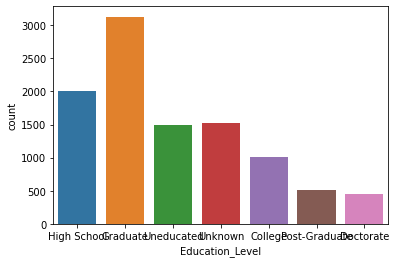

In [ ]:
sns.countplot(data=dataset, x="Education_Level")
plt.show()

segun los datos mostrados el obtener una tarjeta se vuelve mas accesible con respecto a un mayor nivel educativo, siendo recien egresados de un pregrado los mayores adquisitores de tarjetas.

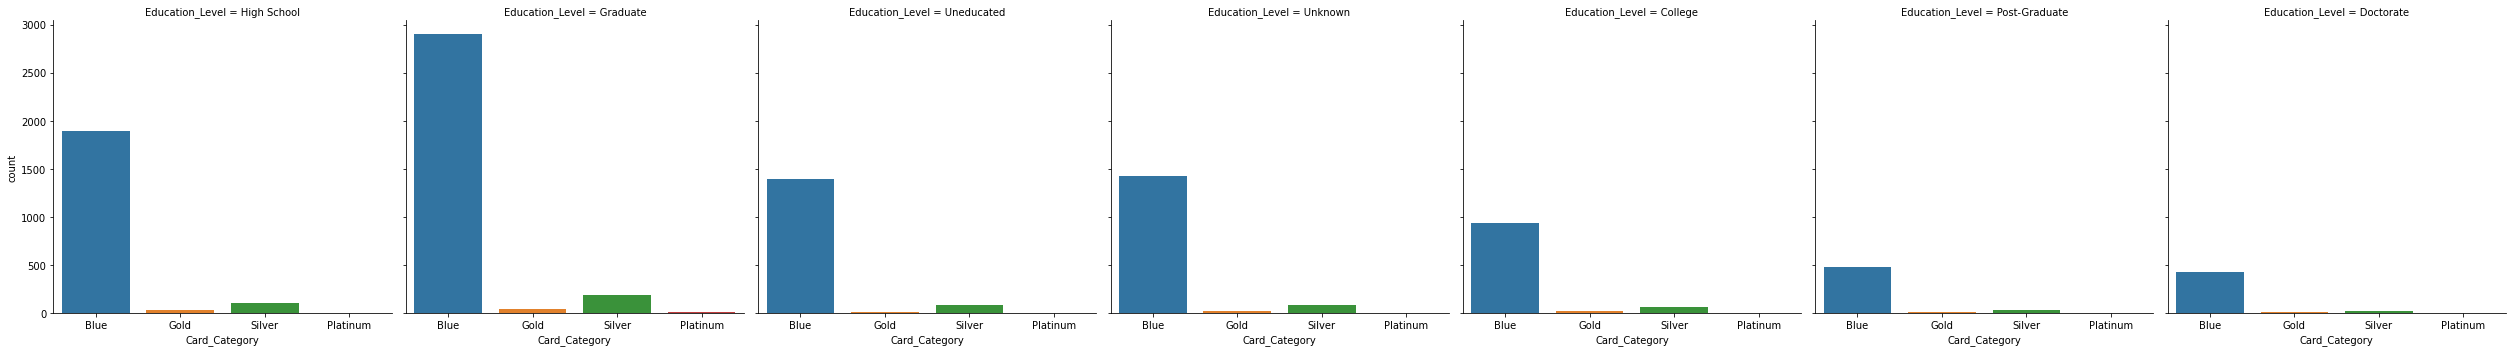

In [ ]:
sns.catplot(data=dataset, kind="count", col="Education_Level", x="Card_Category")
plt.show()

En esta grafica se muestra el nivel de estudio de la variable "Gender" genero en la cual se puede apreciar que las mujeres poseen mas estudios que los hombres.

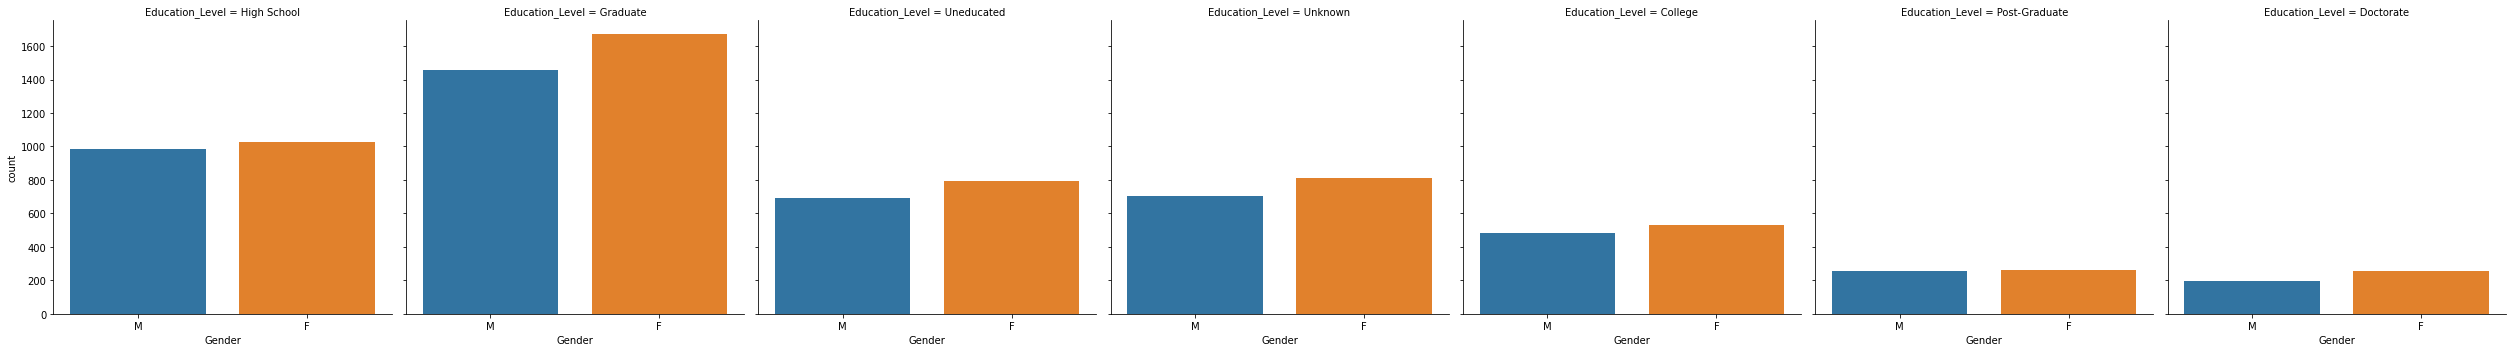

In [ ]:
sns.catplot(data=dataset, kind="count", col="Education_Level", x="Gender")
plt.show()

se puede ver como la mayoria de clientes poseen una targeta de credito de categoria azul y dentro de esta la mayoria son mujeres.

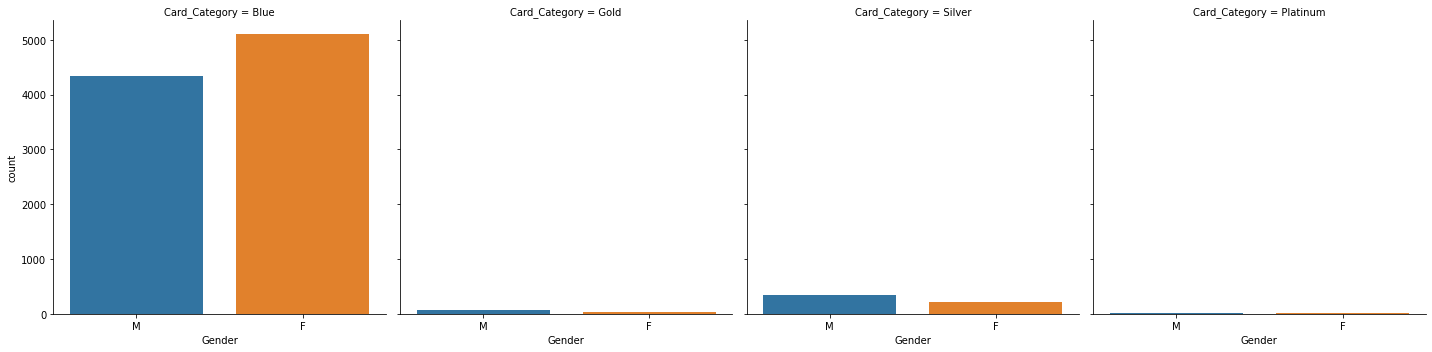

In [ ]:
sns.catplot(data=dataset, kind="count", col="Card_Category", x="Gender")
plt.show()

segun la grafica  presentada hay un nivel de mora representativo en el mes 36 donde la cantidad de presonas que deben su cuota de pago.

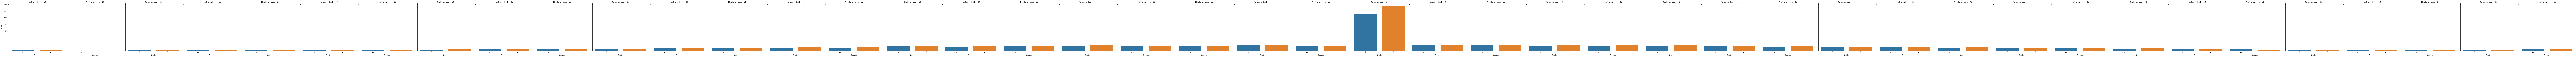

In [ ]:
sns.catplot(data=dataset, kind="count", col="Months_on_book", x="Gender")
plt.show()

Visualizacion de proporciones de las personas y su nivel educativo

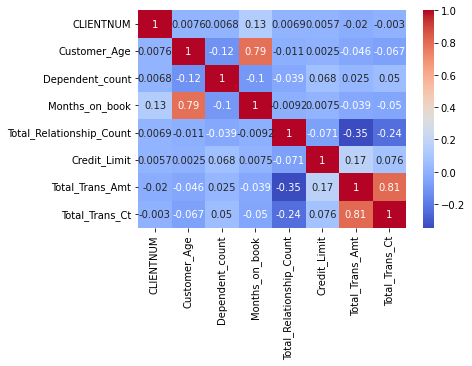

In [ ]:
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Por cada CLIENTNUM que aumente el Customer_Age disminuye -0.0076, teniendo en cuenta estas correlacciones, por cada unidad que Customer-Age aumente, Month_on_book aumenta un 0.79, de igual forma por cada unidad que aumente el total_trans_amt, total_trans_ct aumenta en 0.81, caso contrario con total_relationship_cocunt, por cada unidad que aumente esta ultima, total trans amt disminuye en 0.35, notando que las varibales estan relacionadas entre si y entre ellas mismas su correlacion es 1, (la misma)